<a name="init"></a>
<h1>Tratamiento imágenes previa</h1>

#### Autor: [Juan Manuel Cornejo](https://www.linkedin.com/in/juanmanuelcornejociruelo/)

En este notebook encontrarás una guía de cómo tratar imágenes para seleccionar el contorno máximo y quitar algo de ruido de la imágen.

<dl>
  <dt><a href="#librerias">1. Importar librerías</a></dt>
      <dd>Librerías usadas</dd>
    
  <dt><a href="#Constantes">2. Constantes usadas</a></dt>
      <dd>Tamaño de imagen y path del dataset</dd>
    
  <dt><a href="#Imagen_suelta">3. Tratamiendo de imágen suelta</a></dt>
      <dd>Aplicaremos el proceso a una imágen apra testearlo</dd>
    
  <dt><a href="#funcion_normalizar">4. Función para tratar todas las imágenes</a></dt>
      <dd>Función con la que tratarémos todas las imágenes</dd>
    
  <dt><a href="#dataframe">5. Creación del dataframe</a></dt>
      <dd>Crearemos un dataframe apra su futuro uso, encoding 1 = Tumor , 0 No hay tumor</dd>
    
  <dt><a href="#visualizacion_data">6. Visualización distribución dataframer</a></dt>
      <dd>Analizar el equilibrio y cantidad de datos</dd>
    
</dl>

<a name="librerias"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
### Importamos liberías necesarias

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
import os
from skimage.io import imread
import cv2
import imutils
import seaborn as sns

<a name="Constantes"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
### Creamos constantes que usaremos mas adelante

In [2]:
IMG_SIZE = (255,255)

PATH = "/Users/jcornejo/Desktop/Brain Tumor ML/data/brain_tumor_dataset/"
PATH_NO = "/Users/jcornejo/Desktop/Brain Tumor ML/data/brain_tumor_dataset/no/"
PATH_SI = "/Users/jcornejo/Desktop/Brain Tumor ML/data/brain_tumor_dataset/yes/"

<a name="Imagen_suelta"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
### Tratamiendo de una imagen suelta
> Seleccionaremos una imagen al azar con tumor.
>
> La trataremos: pasar a escala de grises, algo azulada.
>
> Quitaremos algo de ruido,mediante erosiones y dilataciones. Buscaremos el mayor perímetro.

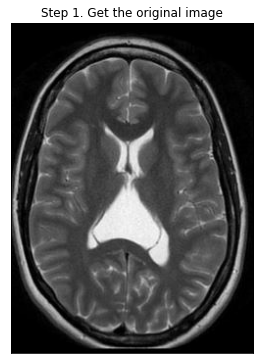

In [5]:
# Seleccionamos imagen al azar
filenames = os.listdir(PATH_SI)
file = random.choice(filenames)

# Cargamos la imagen , la pasamos a escálas de grises 
# y la pondremos de azul ligeramente
image = cv2.imread(PATH_SI + file)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

plt.figure(figsize=(20,10))
plt.subplot(141)
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')

# threshold de la imagen,  se realizan serie de erosiones +
# dilataciones para remover algo de ruido
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# buscamos los contornos en el thresholded ,
#nos quedamos con el mayor de ellos
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea) 

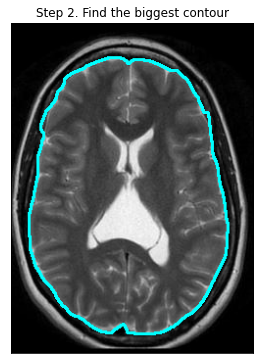

In [6]:
# buscamos los contornos en el thresholded ,
#nos quedamos con el mayor de ellos
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)
img_cnt = cv2.drawContours(image.copy(), [c], -1, (0, 255, 255), 2)

plt.figure(figsize=(20,10))
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour');

Text(0.5, 1.0, 'Step 3. Find the extreme points')

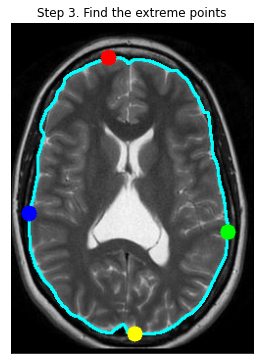

In [7]:
# Dibuja el contorno del objeto, luego dibuja cada uno de los
# puntos extremos, donde el de la izquierda es azul, el más a la derecha
# es verde, la parte superior es rojo y la parte inferior es amarillo
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt.copy(), extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt.copy(), extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)
plt.figure(figsize=(20,10))
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')

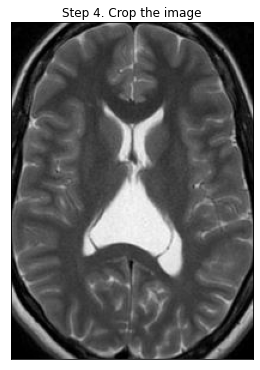

In [8]:
#Por último cortamos la imagen en base a los extremos
ADD_PIXELS = 0
new_img = image[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

plt.figure(figsize=(20,10))
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show();

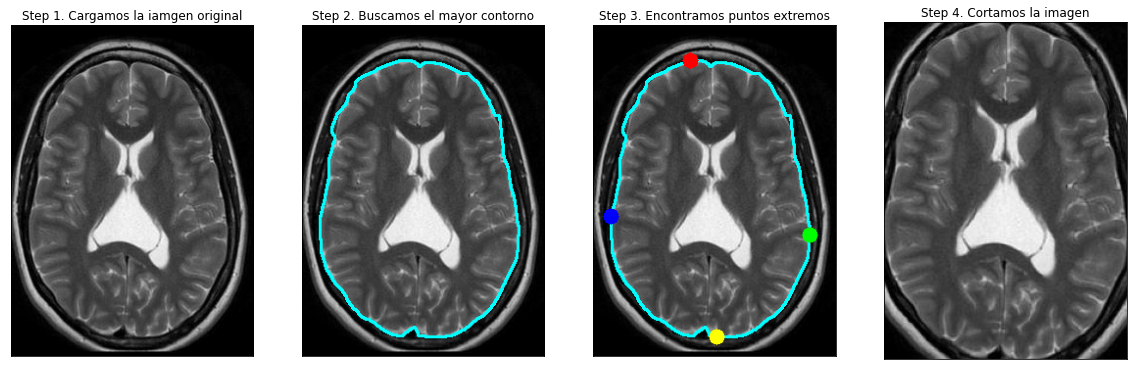

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Cargamos la imagen original')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Buscamos el mayor contorno')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Encontramos puntos extremos')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Cortamos la imagen')
plt.show()

### Preparamos el encoding

Crearemos un diccionario, para crear el encoding necesario para el dataframe.

* 0 = Sin tumor
* 1 = Con tumor

In [3]:
class_name = {'no': 0, 'yes': 1}

<a name="funcion_normalizar"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
## Función para recortar y normalizar las imágenes.

In [4]:
add_pixels_value = 0
#Función que normaliza las imagenes según vimos anteriormente
def normalizacion(path, guardado):
    
    directorios = ['no','yes']
    for directorio in directorios:
        i = 0
        path_aux = (path + directorio)
        for imagen in os.listdir(path_aux):
            
            image = cv2.imread(path_aux +'/'+ imagen)

            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            gray = cv2.GaussianBlur(gray, (5, 5), 0)
            
            thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
            thresh = cv2.erode(thresh, None, iterations=2)
            thresh = cv2.dilate(thresh, None, iterations=2)

            cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)
            cnts = imutils.grab_contours(cnts)
            c = max(cnts, key=cv2.contourArea)
            img_cnt = cv2.drawContours(image.copy(), [c], -1, (0, 255, 255), 2)
            
            extLeft = tuple(c[c[:, :, 0].argmin()][0])
            extRight = tuple(c[c[:, :, 0].argmax()][0])
            extTop = tuple(c[c[:, :, 1].argmin()][0])
            extBot = tuple(c[c[:, :, 1].argmax()][0])

            img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
            img_pnt = cv2.circle(img_pnt.copy(), extRight, 8, (0, 255, 0), -1)
            img_pnt = cv2.circle(img_pnt.copy(), extTop, 8, (255, 0, 0), -1)
            img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

            ADD_PIXELS = add_pixels_value
            new_img = image[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

            #gray_image=cv2.cvtColor(new_img,cv2.COLOR_BGR2GRAY)
            
            imagen_nom = guardado + directorio + '.' + str(i)  + '_normalizada.jpg'
            cv2.imwrite(imagen_nom, new_img)
            i += 1

In [6]:
guardado = "/Users/jcornejo/Desktop/Brain Tumor ML/data/Brain_tumor_dataset_normalizado/"

In [30]:
normalizacion(PATH, guardado)

<a name="dataframe"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
### Creación del DataFrame

* Procederemos a crear el DF ayudandonos del diccionario para hacer el encoding
* Posteriormente lo visualizaremos apra ver que está repartido nuestro DF
* Por último lo guardaremos apra trabajar con el ams adelante

In [7]:
# Listamos todos los archivos de la carpeta de guardado(donde están todas las imágenes normalizadas)
filenames = os.listdir(guardado)
print('todos',len(filenames))
filenames.remove('.DS_Store')
print('sin ocultos',len(filenames))

#Creamos una lsita vacía para nuestro encoding
Tumor = []

# Iteramosterar sobre los archivos
for filename in filenames:
    category = filename.split('.')[0]

    Tumor.append(class_name[category])
    
tumor_df = pd.DataFrame({
    'Filename': filenames,
    'Target': Tumor

})

tumor_df.head()

todos 254
sin ocultos 253


,Filename,Target
0,yes.5_normalizada.jpg,1
1,no.51_normalizada.jpg,0
2,yes.53_normalizada.jpg,1
3,yes.136_normalizada.jpg,1
4,yes.14_normalizada.jpg,1


In [17]:
tumor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filename  253 non-null    object
 1   Target    253 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


<a name="visualizacion_data"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
### Visualización y distribución del DF 

Ya tenemos un DF , donde hemos codificado con 1 imagen con Tumor, con 0 imagen sin tumor

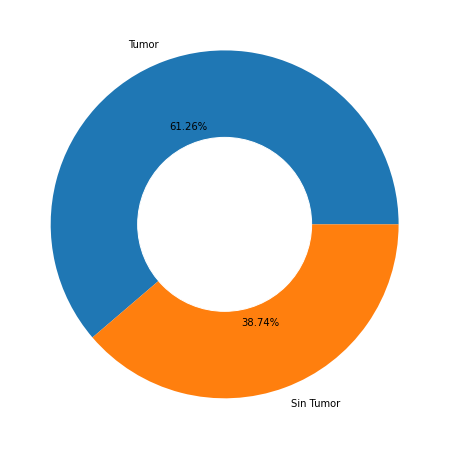

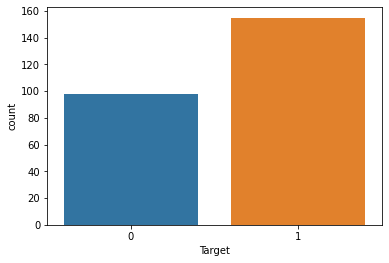

In [9]:
data = tumor_df['Target'].value_counts()

diagnosis_size = data.values

 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.5, color='white', )

plt.figure(figsize=(8,8))
plt.pie(data.values,
        labels=['Tumor', 'Sin Tumor'],
        autopct='%1.2f%%',
       )
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

sns.countplot(x='Target', data=tumor_df);

In [32]:
tumor_df.to_csv('../data/df_tumor.csv', header=True, index=False)
tumor_df.head()

,Filename,Target
0,yes.5_normalizada.jpg,1
1,no.51_normalizada.jpg,0
2,yes.53_normalizada.jpg,1
3,yes.136_normalizada.jpg,1
4,yes.14_normalizada.jpg,1


In [33]:
verificar = pd.read_csv('../data/df_tumor.csv')
verificar.head()

,Filename,Target
0,yes.5_normalizada.jpg,1
1,no.51_normalizada.jpg,0
2,yes.53_normalizada.jpg,1
3,yes.136_normalizada.jpg,1
4,yes.14_normalizada.jpg,1
